# Pre-Exploratory Data Analysis

The first step is to load the dataset and learn basic information about it

In [109]:
import pandas as pd

# loads X train dataset (features of each instance)
x_train = pd.read_csv('Dataset/x_train_all.csv')
# load Y train dataset (classes of each instance)
y_train=pd.read_csv('Dataset/y_train_all.csv')

In [110]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [111]:
# gets (number of instances, no. of features)
x_train.shape

(9690, 2304)

In [112]:
# checks for null values
x_train.isnull().sum().sum() > 0

False

In [113]:
# gets an example of an instance
x_train.iloc[:1]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0


In [114]:
y_train.shape

(9690, 1)

From the above we confirm that:
1. The dataset is made up of 9690 instances of 2304 features (or 9690 images with a 48x48 resolution)
2. The dataset has no null values, so theres is no need to filter them out
3. Each instance belongs to one class

Next, we look at the class distribution

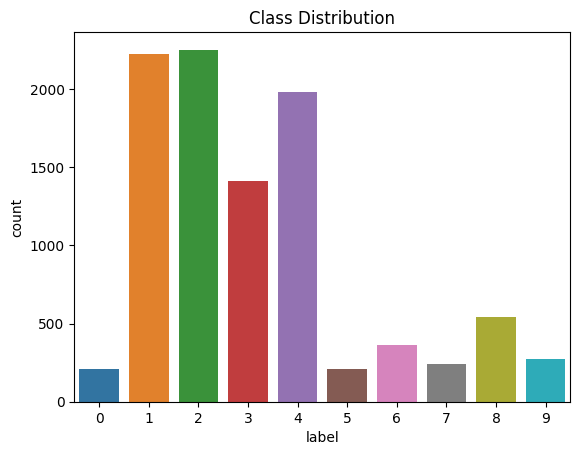

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# renames the column containing labels (classes) to 'label'
y_train.rename(columns={'0': 'label'},inplace=True)

# makes a bar graph counting the number of instances for each label
sns.countplot(data=y_train, x='label')
plt.title('Class Distribution')
plt.show()

Clearly, the class distribution is very uneven, we will have to deal with this when training the model

Next, we look for outliers

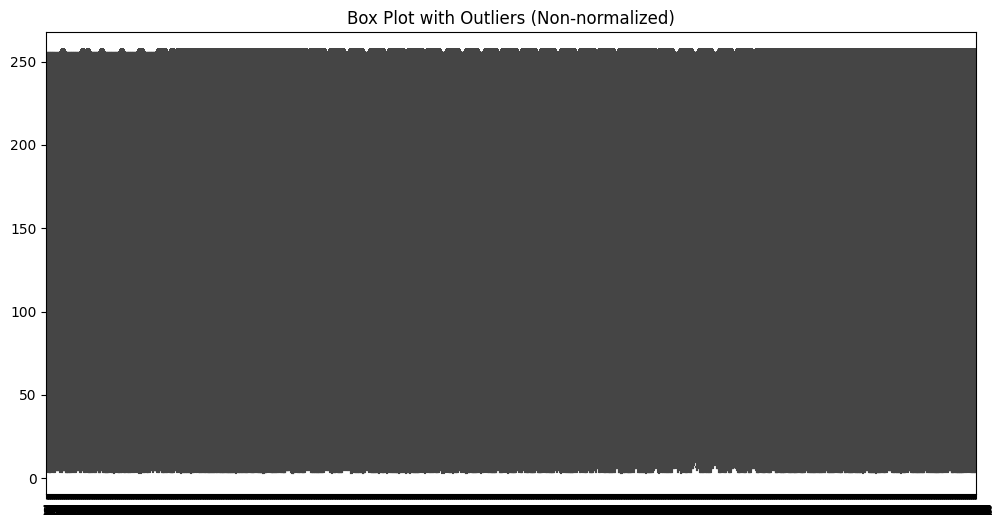

In [116]:
# Creates a box plot to identify potential outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=x_train)
plt.title('Box Plot with Outliers (Non-normalized)')
plt.show()

We use an isolation forest model to detect outliers within our dataset.

In [117]:
# uses isolation forest algorithm to find outliers
from sklearn.ensemble import IsolationForest

# TODO
feature_names = [f'feature_{str(col)}' for col in x_train.columns]
x_train_copy = x_train.copy()
x_train_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_copy)

outlier_indices = x_train_copy.index[outliers == -1]

x_train_no_outliers = x_train_copy.drop(outlier_indices)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

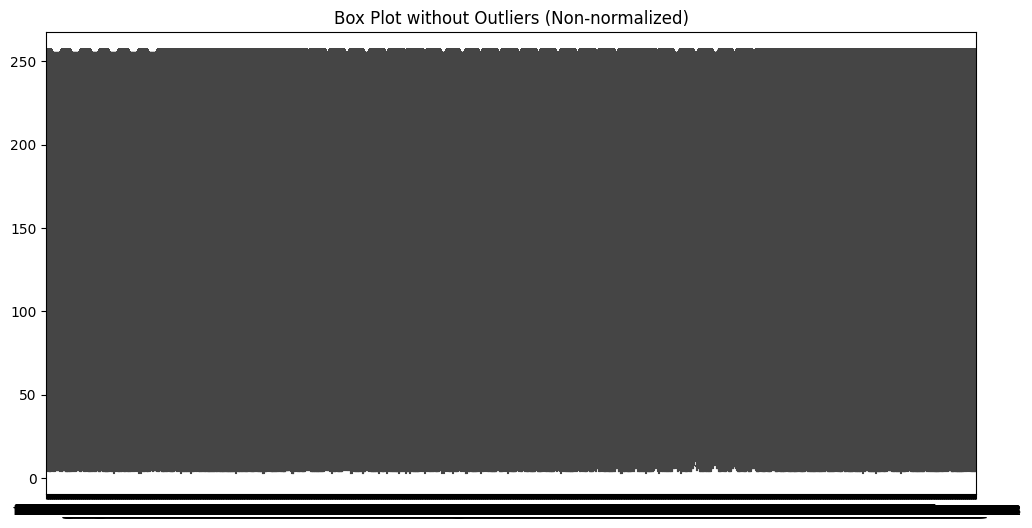

In [118]:
# creates a box plot without the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=x_train_no_outliers)
plt.title('Box Plot without Outliers (Non-normalized)')
plt.show()

In [119]:
print("Total number of images:", x_train.shape[0])
print("Number of images excluding outliers:", x_train_no_outliers.shape[0])
print("Number of outliers removed:", x_train.shape[0] - x_train_no_outliers.shape[0])

Total number of images: 9690
Number of images excluding outliers: 9593
Number of outliers removed: 97


As seen above, outliers are hardly noticeable in the graph, and not many were found (only 97). We can fix this by mining the outliers

In [120]:
# We perform z-normalization on our dataset

mean=x_train.mean()
std=x_train.std()
x_train_norm=(x_train-mean)/std
x_train_norm

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-0.150391,-0.162019,-0.172510,-0.097637,-0.036321,0.027779,0.183130,0.376504,0.348157,0.382097,...,0.225873,0.109515,0.009264,0.083321,0.205589,0.404792,0.477724,0.472859,0.432739,0.418963
1,-0.214889,-0.187848,-0.133726,-0.149251,-0.178371,-0.192203,-0.011458,0.220825,0.555781,0.446901,...,0.363553,0.323454,0.208034,0.098671,-0.010174,0.063867,0.228791,0.504208,0.527321,0.529189
2,-0.227789,-0.187848,-0.133726,-0.162154,-0.113803,-0.011041,0.196103,0.246771,-0.054114,-0.006728,...,0.394149,0.354016,0.253904,0.144723,0.051472,0.032874,0.088767,0.190725,0.338157,0.434710
3,-0.292287,-0.252422,-0.198367,-0.123444,0.041161,0.221881,0.260966,0.078119,-0.274715,0.122880,...,0.608317,0.308172,0.238614,0.175424,0.113119,0.048370,0.026534,0.065332,0.212048,0.324484
4,-0.201990,-0.200763,-0.211295,-0.226672,-0.165458,-0.036921,0.183130,0.246771,-0.080067,-0.097454,...,0.424744,0.399861,0.422093,0.451734,0.452175,0.311812,0.151000,-0.028713,0.007120,0.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,2.029654,1.684798,2.128704,1.592712,0.506053,1.528831,2.129016,2.140865,2.138915,2.131807,...,-0.569611,-0.654553,-0.678785,-0.684207,-0.688287,-0.710962,-0.720262,-0.655679,-0.654953,-0.636050
9686,0.791285,0.367488,2.128704,2.134657,2.133176,2.137016,2.129016,2.127892,2.125938,2.092924,...,-0.539015,-0.623990,-0.632915,-0.622805,-0.611229,-0.602486,-0.611354,-0.655679,-0.623425,-0.636050
9687,2.132851,2.136816,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.477824,-0.348926,-0.449436,-0.530701,-0.564994,-0.509506,-0.455772,-0.577308,-0.450025,-0.384107
9688,2.132851,2.110986,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.523717,-0.685116,-0.694075,-0.668856,-0.534170,-0.633479,-0.642471,-0.655679,-0.654953,-0.683289


In [121]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(x_train))

Normalizing may have other benefits, we will see this when we get to data modelling

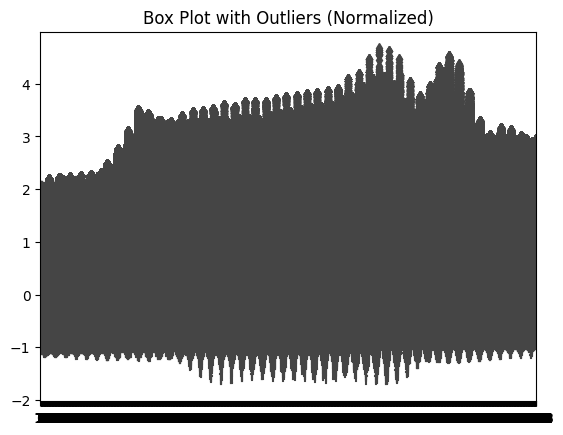

In [122]:
# makes a box plot of the normalized data
sns.boxplot(data=x_train_norm)
plt.title('Box Plot with Outliers (Normalized)')
plt.show()

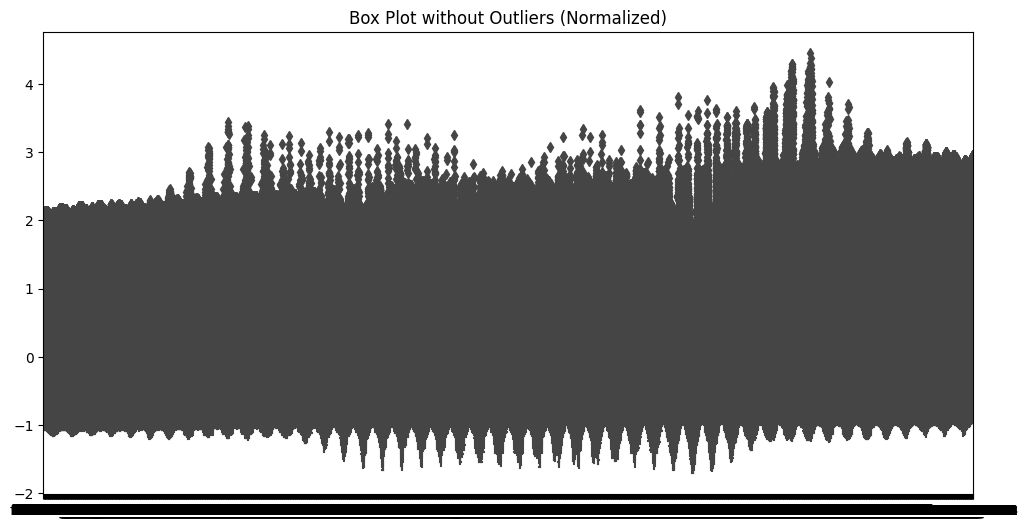

In [123]:
# On the normalized dataset, we run another isolation forest model to detect outliers from it.

x_train_norm.columns = feature_names

x_train_norm_copy = x_train_norm.copy()
contamination = 0.41
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_norm_copy)

outlier_indices = x_train_norm_copy.index[outliers == -1]

x_train_no_outliers_norm = x_train_norm_copy.drop(outlier_indices)
plt.figure(figsize=(12, 6))

sns.boxplot(data=x_train_no_outliers_norm)
plt.title('Box Plot without Outliers (Normalized)')
plt.show()

outlier_indices_df = pd.DataFrame({'outlier_index_norm': outlier_indices})
outlier_indices_df.to_csv('outlier_indices_norm.csv', index=False)

In [124]:
print("Total number of images:", x_train_norm.shape[0])
print("Number of images excluding outliers:", x_train_no_outliers_norm.shape[0])
print("Number of outliers removed:", x_train_norm.shape[0] - x_train_no_outliers_norm.shape[0])

Total number of images: 9690
Number of images excluding outliers: 5717
Number of outliers removed: 3973


As seen above, normalizing had a noticeable impact in the number of outliers found, its effect on model accuracy will be tested when we get to modelling

Now we also remove the Y train

In [125]:
# loads the previously saved pre-processed datasets
# avoids having to run the pre-processing code again
df_x_train_no_outliers=pd.read_csv('x_train_no_outliers.csv')
df_x_train_no_outliers_norm=pd.read_csv('x_train_no_outliers_norm.csv')

# removes previous indices, since many were skipped due to outlier mining
df_x_train_no_outliers.drop('Unnamed: 0',axis=1, inplace=True)
df_x_train_no_outliers_norm.drop('Unnamed: 0',axis=1, inplace=True)

In [126]:
# applies outlier mining to y train

# loads the indices to be removed from each dataset
indices_to_remove = pd.read_csv('outlier_indices.csv')
indices_to_remove_norm = pd.read_csv('outlier_indices_norm.csv')

# removes outliers from y train
y_train_filtered_outlier = y_train[~y_train.index.isin(indices_to_remove['outlier_index'])]

# removes outliers found after normalizing from y train
y_train_filtered_outlier_norm = y_train[~y_train.index.isin(indices_to_remove_norm['outlier_index_norm'])]

# saves to csv for future use
y_train_filtered_outlier.to_csv('y_train_filtered_outlier.csv')
y_train_filtered_outlier_norm.to_csv('y_train_filtered_outlier_norm.csv')

In [127]:
# load y train without outliers
y_train_filtered_outlier=pd.read_csv('y_train_filtered_outlier.csv')
y_train_filtered_outlier_norm=pd.read_csv('y_train_filtered_outlier_norm.csv')

# drop previous indices
y_train_filtered_outlier.drop('Unnamed: 0',axis=1, inplace=True)
y_train_filtered_outlier_norm.drop('Unnamed: 0',axis=1, inplace=True)

# Pre-Processing

Now, we plot image histograms to check if there is an even or normally distributed spread of pixel values

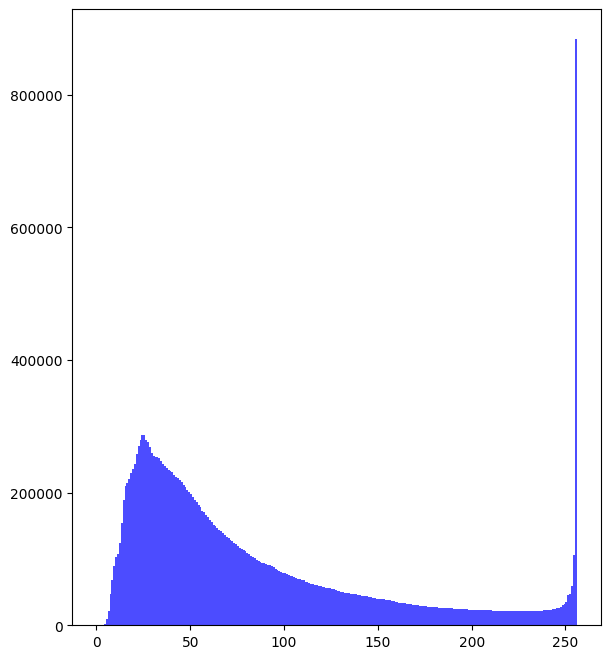

In [128]:
import numpy as np

data = x_train.iloc[1:9690]

x_train.iloc[:1]

image_data = np.array(data, dtype=np.uint8)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.hist(image_data.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)

plt.show()

As you can see, the values of the pixels are skewed towards lower (darker) values. This indicates bad contrast, which makes details harder to make out and may negatively affect a model's performance.

In order to understand how our images interact with augmentation techniques, we applied the well known equalizeHist function provided by OpenCV to get a better idea on what kind of augmentation techniques to apply.

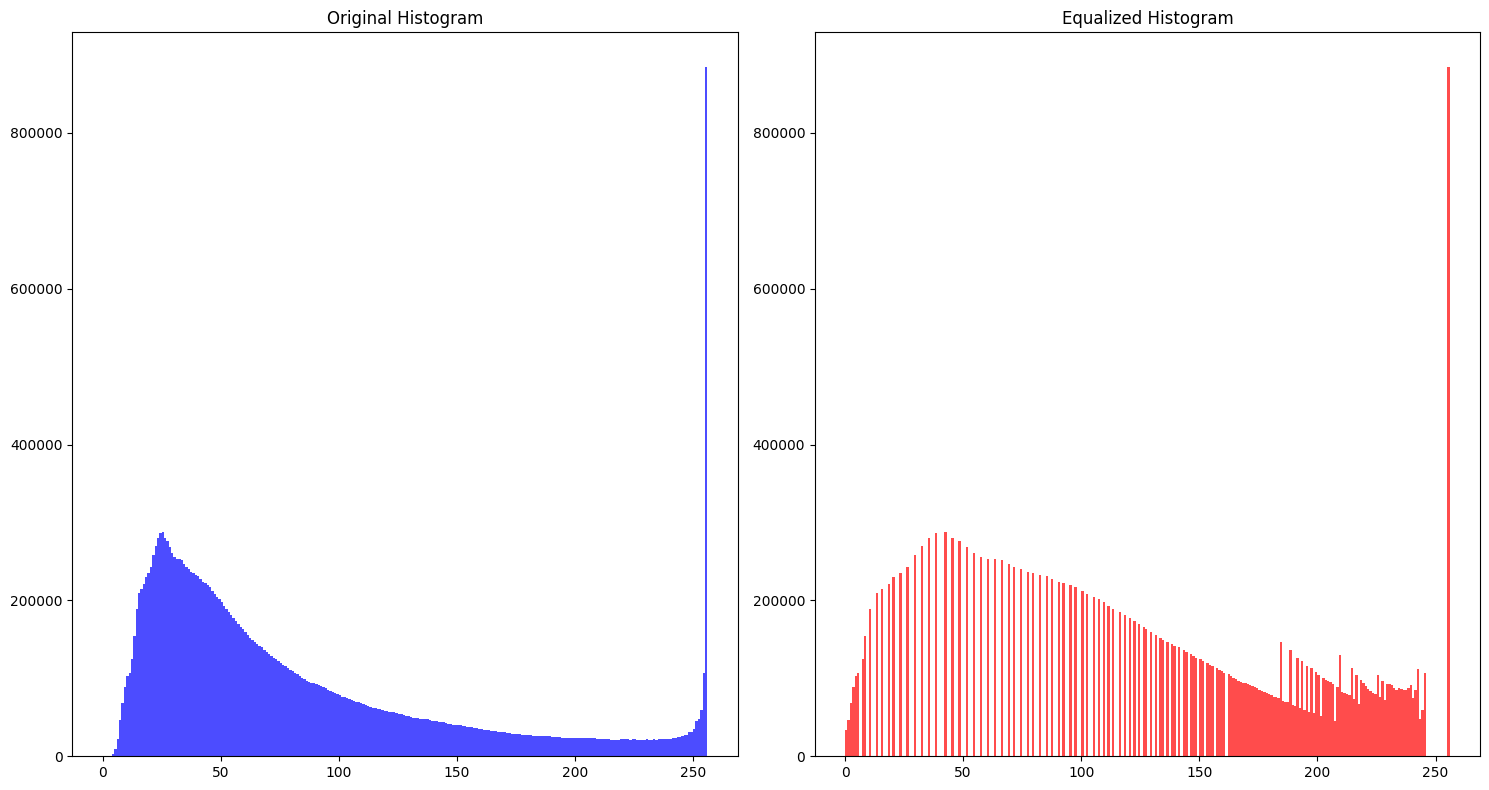

In [129]:
import cv2

equalized_image = cv2.equalizeHist(image_data)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.hist(image_data.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Original Histogram')

plt.subplot(122)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='r', alpha=0.7)
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

From the graphs, we observe that although the pixel distribution has been shifted towards the middle, the data is not yet normalized towards the median of our pixel range (0 - 255).

From this behavior, we decide to apply the following techniques to augment the images further:

In [130]:
# defines functions for pre-processing

# applies dynamic contrasting to images based on their histograms
def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

# dynamically brightens images based on their pixel distribution
def brighten(row, target_mean_brightness=128, max_brightness_adjustment=50):
    current_mean_brightness = np.mean(row)
    brightness_adjustment = target_mean_brightness - current_mean_brightness
    brightness_adjustment = np.clip(brightness_adjustment, -max_brightness_adjustment, max_brightness_adjustment)
    scaling_factor = (current_mean_brightness + brightness_adjustment) / current_mean_brightness
    adjusted_row = row * scaling_factor
    adjusted_row[adjusted_row < 0] = 0
    adjusted_row[adjusted_row > 255] = 255
    return adjusted_row

# makes dark areas darker and light areas lighter, accentuates the image
def apply_gamma_correction(row, gamma=1.8):
    input_shape = row.shape
    row = np.array(row, dtype=np.uint8)
    corrected_row = ((row / 255.0) ** (1 / gamma) * 255).astype(np.uint8)
    corrected_row = corrected_row.reshape(*input_shape) 
    return corrected_row

def add_noise(row, noise_level=20):
    row = row + noise_level * np.random.randn(*row.shape)
    row[row < 0] = 0
    row[row > 255] = 255
    return row

# blurs using a gaussian function
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

The above functions are applied in the following order to our raw images:

1. Brighten the image.
2. Gamma correction - Make dark areas darker and light areas lighter to further increase contrast, accentuating the image.
3. Add noise to the image, we believe this makes the quality of the images more consistent.
4. We apply gaussian blue to the image to further improve consistency
5. We bring everything together and finish with applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to dynamically increase contrast, aiding visibility.

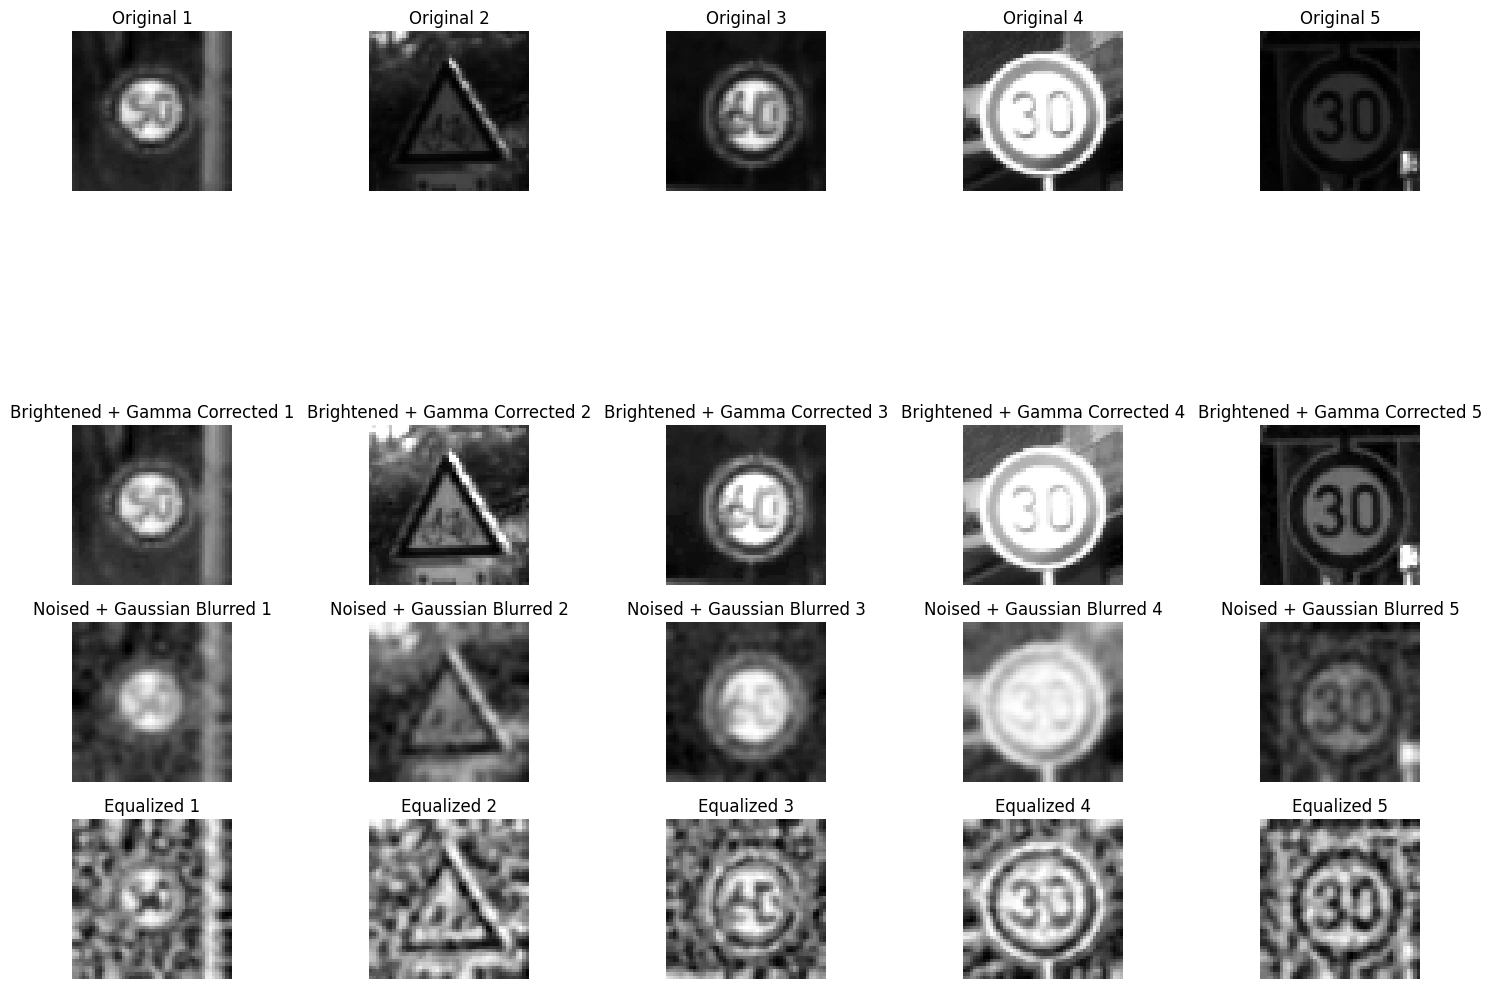

In [131]:
# We plot the visualization of our row (image) at each milestone clearly highlighting how it transforms throughout our image augmentation process.

import matplotlib.pyplot as plt

x_copy = x_train.copy()

sample_size = 5
sample_indices = x_copy.sample(sample_size).index

num_rows = 4
num_cols = 5

plt.figure(figsize=(15, 10))


for i, idx in enumerate(sample_indices):
    plt.subplot(5, sample_size, i + 1)
    original_image = x_copy.iloc[idx].values.reshape(48, 48)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    brightened_image = brighten(x_copy.iloc[idx].values)
    gamma_image = apply_gamma_correction(brightened_image)

    plt.subplot(5, sample_size, 2 * sample_size + i + 1)
    gamma_image = gamma_image.reshape(48, 48)
    plt.imshow(gamma_image, cmap='gray')
    plt.title(f'Brightened + Gamma Corrected {i+1}')
    plt.axis('off')

    noisy_image = add_noise(gamma_image)
    blurred_image = apply_gaussian_blur(noisy_image, kernel_size=(5, 5), sigma=0)

    plt.subplot(5, sample_size, 3 * sample_size + i + 1)
    blurred_image = blurred_image.reshape(48, 48)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Noised + Gaussian Blurred {i+1}')
    plt.axis('off')

    equalized_image = apply_clahe(blurred_image)  # Apply CLAHE

    plt.subplot(5, sample_size, 4 * sample_size + i + 1)
    equalized_image = equalized_image.reshape(48, 48)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'Equalized {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

As we can see, brightening and gamma correction improve image visibility, but noise and blur do not. However, despite seeming less visible, they still improve the model's accuracy.

In [132]:
# pre-processing images with the functions above (excl. noise and blur). we do the following without applying noise and blurring 
# as our feature selection yields a higher accuracy when fed the dataset without noising and gaussian blurring.

processed_images = []

for i, idx in enumerate(x_copy.index):
    original_image = x_copy.iloc[idx].values.reshape(48, 48)
    brightened_image = brighten(x_copy.iloc[idx].values).reshape(48, 48)
    gamma_image = apply_gamma_correction(brightened_image)
    equalized_image = apply_clahe(gamma_image)
    processed_images.append(equalized_image.flatten())

processed_df_old = pd.DataFrame(processed_images)
processed_df_old.shape

(9690, 2304)

Now we pre-process the images all our functions (including noise and blurring)

In [133]:
# pre-processing images with the functions above
processed_images = []

for i, idx in enumerate(x_copy.index):
    original_image = x_copy.iloc[idx].values.reshape(48, 48)
    brightened_image = brighten(x_copy.iloc[idx].values).reshape(48, 48)
    gamma_image = apply_gamma_correction(brightened_image)
    noisy_image = add_noise(gamma_image)
    gaussian_image = apply_gaussian_blur(noisy_image)
    equalized_image = apply_clahe(gaussian_image)

    processed_images.append(equalized_image.flatten())

processed_df = pd.DataFrame(processed_images)
processed_df.shape

(9690, 2304)

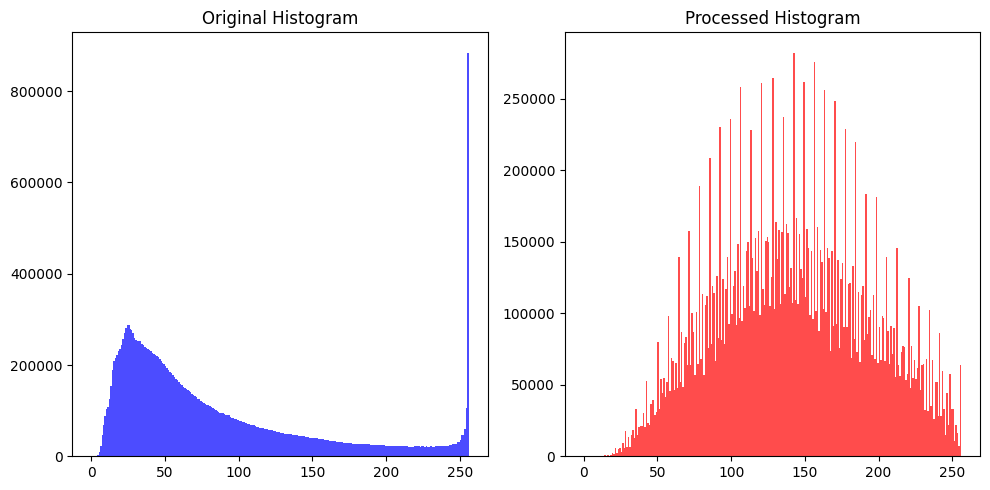

In [134]:
image_data = np.array(data, dtype=np.uint8)
processed_data = np.array(processed_df.iloc[1:9593], dtype=np.uint8)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(image_data.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Original Histogram')

plt.subplot(122)
plt.hist(processed_data.ravel(), bins=256, range=(0, 256), color='r', alpha=0.7)
plt.title('Processed Histogram')

plt.tight_layout()
plt.show()

After pre-processing, our pixels have a far better distribution

# Modelling

Now that we have processed the images, we can train our model, first without noise and blurring

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, multilabel_confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics._classification import _nanaverage

# after testing through several seed values, 22 is the best seed value for our chosen dataset and model
seed_value = 22

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(processed_df_old, y_train, test_size=0.3, random_state=seed_value)

# initialize the model and fit it to our data
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# test the model
predicted = gnb.predict(X_test)
predicted_probs = gnb.predict_proba(X_test)

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
# gets common model performance metrics

accuracy = accuracy_score(Y_test, predicted)
f1 = f1_score(Y_test, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test, predicted)

Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4,5,6,7,8,9])
roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(Y_test, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test, predicted)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
tp = conf_matrices[:,1,1] # True positive      
fp = conf_matrices[:,0,1] # False positive     
tn = conf_matrices[:,0,0] # True negative      
fn = conf_matrices[:,1,0] # False negative     
fpr = _nanaverage(fp/(tn + fp), tp + fn) # False positive rate
tnr = _nanaverage(tn/(tn + fp), tp + fn) # True negative rate

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
print("Specificity:", tnr)
print("False Positive Rate:", fpr)
print("Area under ROC curve:", roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.49810801513587893
F1 Score: 0.5076464069040112
Precision: 0.5799946290969333
Recall/Sensitivity/True Positive Rate: 0.49810801513587893
Specificity: 0.920423278954211
False Positive Rate: 0.07957672104578879
Area under ROC curve: 0.8316810687426335
Confusion Matrix:
 [[ 49   4   5   0   4   0   2   0   0   1]
 [159 211  84  62 132   0  17   0   0  21]
 [ 23  72 315  66 136   2  39   0   0  11]
 [ 20  15  32 183 109   0  42   0   0  19]
 [ 43  27  36  64 389   0  18   0   0   6]
 [  0   0   0   0   2  47  10   1   2   3]
 [  0   1   0   1   1   7  71   0   3  20]
 [  0   0   0   0   0   5   2  43   1  14]
 [  0   1   1   2   0  22  26   3  99  24]
 [  0   0   1   1   3  15  11   0   5  41]]


Now with all our image pre-processed data (including noising and blurring as well)

In [137]:
# after testing, 22 is the best seed value for our chosen dataset and model
seed_value = 22

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3, random_state=seed_value)

# initialize the model and fit it to our data
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# test the model
predicted = gnb.predict(X_test)
predicted_probs = gnb.predict_proba(X_test)

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
# gets common model performance metrics

accuracy = accuracy_score(Y_test, predicted)
f1 = f1_score(Y_test, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test, predicted)

Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(Y_test, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test, predicted)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
tp = conf_matrices[:,1,1]
fp = conf_matrices[:,0,1]
tn = conf_matrices[:,0,0]
fn = conf_matrices[:,1,0]
fpr = _nanaverage(fp/(tn + fp), tp + fn)
tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
print("Specificity:", tnr)
print("False Positive Rate:", fpr)
print("Area under ROC curve:", roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5810113519091847
F1 Score: 0.5862691826751524
Precision: 0.625179745584183
Recall/Sensitivity/True Positive Rate: 0.5810113519091847
Specificity: 0.9243953209211202
False Positive Rate: 0.0756046790788798
Area under ROC curve: 0.8679587907347008
Confusion Matrix:
 [[ 49   3   6   1   5   0   1   0   0   0]
 [144 256  83  69 115   0  12   0   0   7]
 [ 17 111 344  80  94   2  10   0   0   6]
 [  7  18  48 237  90   0  19   0   0   1]
 [ 61  42   9  42 424   0   3   0   0   2]
 [  0   0   0   0   1  53   6   0   3   2]
 [  0   1   0   5   0   5  83   1   6   3]
 [  0   0   0   0   0   5   2  49   1   8]
 [  1   1   1   2   0  14  20   0 135   4]
 [  1   1   2   2   0   8   2   0   2  59]]


Noise and blur greatly increased accuracy, meaning that our assumption was correct.

Now we normalize our pre-processed dataset

In [139]:
# Z normalization to preprocessed data
mean=processed_df.mean()
std=processed_df.std()
processed_df_norm=(processed_df-mean)/std

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 22

X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(processed_df_norm, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train_norm, Y_train_norm)

predicted = gnb.predict(X_test_norm)

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
accuracy = accuracy_score(Y_test_norm, predicted)
f1 = f1_score(Y_test_norm, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_norm, predicted)

Y_test_bin = label_binarize(Y_test_norm, classes=[0, 1, 2,3,4,5,6,7,8,9])
roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

accuracy = accuracy_score(Y_test_norm,predicted )
f1 = f1_score(Y_test_norm, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_norm, predicted)
precision = precision_score(Y_test_norm, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test_norm, predicted, average="weighted")
conf_matrices = multilabel_confusion_matrix(Y_test_norm, predicted)
tp = conf_matrices[:,1,1] # True positive      
fp = conf_matrices[:,0,1] # False positive     
tn = conf_matrices[:,0,0] # True negative      
fn = conf_matrices[:,1,0] # False negative     
fpr = _nanaverage(fp/(tn + fp), tp + fn) # False positive rate
tnr = _nanaverage(tn/(tn + fp), tp + fn) # True negative rate

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
print("Specificity:", tnr)
print("False Positive Rate:", fpr)
print("Area under ROC curve:", roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5810113519091847
F1 Score: 0.5862691826751524
Precision: 0.625179745584183
Recall/Sensitivity/True Positive Rate: 0.5810113519091847
Specificity: 0.9243953209211202
False Positive Rate: 0.0756046790788798
Area under ROC curve: 0.8679587907347008
Confusion Matrix:
 [[ 49   3   6   1   5   0   1   0   0   0]
 [144 256  83  69 115   0  12   0   0   7]
 [ 17 111 344  80  94   2  10   0   0   6]
 [  7  18  48 237  90   0  19   0   0   1]
 [ 61  42   9  42 424   0   3   0   0   2]
 [  0   0   0   0   1  53   6   0   3   2]
 [  0   1   0   5   0   5  83   1   6   3]
 [  0   0   0   0   0   5   2  49   1   8]
 [  1   1   1   2   0  14  20   0 135   4]
 [  1   1   2   2   0   8   2   0   2  59]]


Accuracy stayed the same, the distribution was already good enough

Now we remove the outliers using an Isolation Forest and try the model again

In [142]:
# Outlier mining to processed data

from sklearn.ensemble import IsolationForest

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(processed_df)

outlier_indices = processed_df.index[outliers == -1]

x_train_no_outliers = processed_df.drop(outlier_indices)
y_train_no_outliers = y_train.loc[x_train_no_outliers.index]

print("Outliers removed:", x_train.shape[0] - x_train_no_outliers.shape[0])

Outliers removed: 97


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 24

X_train_out, X_test_out, Y_train_out, Y_test_out = train_test_split(x_train_no_outliers, y_train_no_outliers, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train_out, Y_train_out)

predicted = gnb.predict(X_test_out)
predicted_probs = gnb.predict_proba(X_test_out)

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
accuracy = accuracy_score(Y_test_out, predicted)
f1 = f1_score(Y_test_out, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_out, predicted)

Y_test_bin = label_binarize(Y_test_out, classes=[0, 1, 2,3,4,5,6,7,8,9])
roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

accuracy = accuracy_score(Y_test_out,predicted )
f1 = f1_score(Y_test_out, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_out, predicted)
precision = precision_score(Y_test_out, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test_out, predicted, average="weighted")
conf_matrices = multilabel_confusion_matrix(Y_test_out, predicted)
tp = conf_matrices[:,1,1] # True positive       
fp = conf_matrices[:,0,1] # False positive     
tn = conf_matrices[:,0,0] # True negative      
fn = conf_matrices[:,1,0] # False negative     
fpr = _nanaverage(fp/(tn + fp), tp + fn) # False positive rate
tnr = _nanaverage(tn/(tn + fp), tp + fn) # True negative rate

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
print("Specificity:", tnr)
print("False Positive Rate:", fpr)
print("Area under ROC curve:", roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.559763724808895
F1 Score: 0.5659818316403189
Precision: 0.6057910760336629
Recall/Sensitivity/True Positive Rate: 0.559763724808895
Specificity: 0.9187195731965917
False Positive Rate: 0.08128042680340833
Area under ROC curve: 0.8596383897834975
Confusion Matrix:
 [[ 40   5   4   1   9   0   2   0   0   0]
 [136 258  84  51 119   0   4   0   0   4]
 [ 24  82 326  91 126   2  14   0   0   5]
 [ 12  16  51 184 119   0  24   0   0   1]
 [ 52  66  10  45 408   0   2   0   0   0]
 [  0   0   0   0   0  54   4   2   5   2]
 [  0   0   0   4   0   3  96   0   6   9]
 [  0   0   0   0   0   7   6  49   1   4]
 [  0   0   0   1   0  13  23   0 131   1]
 [  0   2   3   0   0   5   1   0   4  65]]


We see that the accuracy dropped from 58% to 56%, our model performed with all values in the dataset.

We try Z normalization on our preprocessed dataset without outliers to see if that makes a difference.

In [145]:
# Z normalization to outlier mined preprocessed data

mean=x_train_no_outliers.mean()
std=x_train_no_outliers.std()
no_out_processed_df_norm=(x_train_no_outliers-mean)/std

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 24

X_train, X_test, Y_train, Y_test = train_test_split(no_out_processed_df_norm, y_train_no_outliers, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

predicted = gnb.predict(X_test)
predicted_probs = gnb.predict_proba(X_test)

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
accuracy = accuracy_score(Y_test_out, predicted)
f1 = f1_score(Y_test_out, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_out, predicted)

Y_test_bin = label_binarize(Y_test_out, classes=[0, 1, 2,3,4,5,6,7,8,9])
roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

accuracy = accuracy_score(Y_test_out,predicted )
f1 = f1_score(Y_test_out, predicted, average="weighted")
conf_matrix = confusion_matrix(Y_test_out, predicted)
precision = precision_score(Y_test_out, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test_out, predicted, average="weighted")
conf_matrices = multilabel_confusion_matrix(Y_test_out, predicted)
tp = conf_matrices[:,1,1] # True positive                 
fp = conf_matrices[:,0,1] # False positive                 
tn = conf_matrices[:,0,0] # True negative                   
fn = conf_matrices[:,1,0] # False negative                 
fpr = _nanaverage(fp/(tn + fp), tp + fn) # False positive rate
tnr = _nanaverage(tn/(tn + fp), tp + fn) # True negative rate

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
print("Specificity:", tnr)
print("False Positive Rate:", fpr)
print("Area under ROC curve:", roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.559763724808895
F1 Score: 0.5659818316403189
Precision: 0.6057910760336629
Recall/Sensitivity/True Positive Rate: 0.559763724808895
Specificity: 0.9187195731965917
False Positive Rate: 0.08128042680340833
Area under ROC curve: 0.8599468172956024
Confusion Matrix:
 [[ 40   5   4   1   9   0   2   0   0   0]
 [136 258  84  51 119   0   4   0   0   4]
 [ 24  82 326  91 126   2  14   0   0   5]
 [ 12  16  51 184 119   0  24   0   0   1]
 [ 52  66  10  45 408   0   2   0   0   0]
 [  0   0   0   0   0  54   4   2   5   2]
 [  0   0   0   4   0   3  96   0   6   9]
 [  0   0   0   0   0   7   6  49   1   4]
 [  0   0   0   1   0  13  23   0 131   1]
 [  0   2   3   0   0   5   1   0   4  65]]


Normalizing the outlier mined dataset did not yield any result, positive or negative.

We found the highest accuracy to be 58%, when we fit our model with the preprocessed dataset and when we fit our model with the normalized pereprocessed dataset.

We will now move on to the feature selection part of this notebook.

# Feature Selection

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import pandas as pd
import seaborn as sns

def naive_bayes_search_non_binary(df1, df2,seed_value=22):
    #
erfor    XPE_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    print("Cross-Validation Scores:", cross_val_scores)
    print("Mean CV Score:", cross_val_scores.mean())


    train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")

    Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = (fp/(tn + fp), tp + fn)
    tnr = _nanaverage(tn/(tn + fp), tp + fn)
    
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    out=ConfusionMatrixDisplay(conf_matrix,display_labels=gnb.classes_)
    out.plot()
    plt.show()
    fpr = _nanaverage(fp/(tn + fp), tp + fn)
    tnr = _nanaverage(tn/(tn + fp), tp + fn)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("Specificity:", tnr)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted





In [161]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# from sklearn.metrics._classification import _nanaverage

def naive_bayes_search(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")
    # roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = _nanaverage(fp/(tn + fp), tp + fn)
    # tnr = _nanaverage(tn/(tn + fp), tp + fn)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    # print("Specificity:", tnr)
    # print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted


In [149]:
import pandas as pd
merged_data = pd.read_csv('processed_df.csv')
# merged_data=pd.read_csv('Dataset/x_train_all.csv')
ytrainall = pd.read_csv('Dataset/y_train_all.csv')
merged_data = pd.concat([merged_data,ytrainall],axis = 1)
merged_data=merged_data.rename(columns={merged_data.columns[-1]:'label'})
merged_data=merged_data.rename(columns={merged_data.columns[0]:'labels'})
merged_data=merged_data.drop(columns =['labels'])
merged_data.columns.values[0] = '0'

Below we initialize the svm model and then fit the x,y . x being the features and  y being the corresding labels

In [150]:
from sklearn.svm import SVC

x = merged_data.drop('label',axis=1)
y = merged_data['label']

svm = SVC(kernel='linear', decision_function_shape='ovr')

svm.fit(x, y)

SVC(kernel='linear')

then we get the coefficients weigths from the svm for each class which later gets us the top features for each class

In [152]:
feature_weights = svm.coef_
k = 20
selected_features_per_class = {}
for class_label in range(10): 
    feature_ranking = np.argsort(np.abs(feature_weights[class_label]))
    selected_features = feature_ranking[:k]
    selected_features_per_class[class_label] = selected_features

In [154]:
xtrain = pd.read_csv('processed_df.csv')
xtrain = xtrain.rename(columns={xtrain.columns[0]:'labels'})
xtrain = xtrain.drop(columns=['labels'])
ytrain0 = pd.read_csv('OnevrsAll/0_vrs_all/y_train_0.csv')
ytrain1 = pd.read_csv('OnevrsAll/1_vrs_all/y_train_1.csv')
ytrain2 = pd.read_csv('OnevrsAll/2_vrs_all/y_train_2.csv')
ytrain3 = pd.read_csv('OnevrsAll/3_vrs_all/y_train_3.csv')
ytrain4 = pd.read_csv('OnevrsAll/4_vrs_all/y_train_4.csv')
ytrain5 = pd.read_csv('OnevrsAll/5_vrs_all/y_train_5.csv')
ytrain6 = pd.read_csv('OnevrsAll/6_vrs_all/y_train_6.csv')
ytrain7 = pd.read_csv('OnevrsAll/7_vrs_all/y_train_7.csv')
ytrain8 = pd.read_csv('OnevrsAll/8_vrs_all/y_train_8.csv')
ytrain9 = pd.read_csv('OnevrsAll/9_vrs_all/y_train_9.csv')

Below we create 10 dataframes with each dataframe having top 20 features for each class 

In [156]:
xy0_20 = None
for i in selected_features_per_class[0]:
    xy0_20 = pd.concat([xy0_20,xtrain.iloc[:,int(i)]],axis=1)
xy0_20 = pd.concat([xy0_20,ytrain0],axis=1)
xy0_20 = xy0_20.rename(columns={xy0_20.columns[-1]:'label'})
    
xy1_20 = None
for i in selected_features_per_class[1]:
    xy1_20 = pd.concat([xy1_20,xtrain.iloc[:,int(i)]],axis=1)
xy1_20 = pd.concat([xy1_20,ytrain1],axis=1)
xy1_20 = xy1_20.rename(columns={xy1_20.columns[-1]:'label'})

xy2_20 = None
for i in selected_features_per_class[2]:
    xy2_20 = pd.concat([xy2_20,xtrain.iloc[:,int(i)]],axis=1)
xy2_20 = pd.concat([xy2_20,ytrain2],axis=1)
xy2_20 = xy2_20.rename(columns={xy2_20.columns[-1]:'label'})

xy3_20 = None
for i in selected_features_per_class[3]:
    xy3_20 = pd.concat([xy3_20,xtrain.iloc[:,int(i)]],axis=1)
xy3_20 = pd.concat([xy3_20,ytrain3],axis=1)
xy3_20 = xy3_20.rename(columns={xy3_20.columns[-1]:'label'})

xy4_20 = None
for i in selected_features_per_class[4]:
    xy4_20 = pd.concat([xy4_20,xtrain.iloc[:,int(i)]],axis=1)
xy4_20 = pd.concat([xy4_20,ytrain4],axis=1)
xy4_20 = xy4_20.rename(columns={xy4_20.columns[-1]:'label'})

xy5_20 = None
for i in selected_features_per_class[5]:
    xy5_20 = pd.concat([xy5_20,xtrain.iloc[:,int(i)]],axis=1)
xy5_20 = pd.concat([xy5_20,ytrain5],axis=1)
xy5_20 = xy5_20.rename(columns={xy5_20.columns[-1]:'label'})

xy6_20 = None
for i in selected_features_per_class[6]:
    xy6_20 = pd.concat([xy6_20,xtrain.iloc[:,int(i)]],axis=1)
xy6_20 = pd.concat([xy6_20,ytrain6],axis=1)
xy6_20 = xy6_20.rename(columns={xy6_20.columns[-1]:'label'})

xy7_20 = None
for i in selected_features_per_class[7]:
    xy7_20 = pd.concat([xy7_20,xtrain.iloc[:,int(i)]],axis=1)
xy7_20 = pd.concat([xy7_20,ytrain7],axis=1)
xy7_20 = xy7_20.rename(columns={xy7_20.columns[-1]:'label'})

xy8_20 = None
for i in selected_features_per_class[8]:
    xy8_20 = pd.concat([xy8_20,xtrain.iloc[:,int(i)]],axis=1)
xy8_20 = pd.concat([xy8_20,ytrain8],axis=1)
xy8_20 = xy8_20.rename(columns={xy8_20.columns[-1]:'label'})

xy9_20 = None
for i in selected_features_per_class[9]:
    xy9_20 = pd.concat([xy9_20,xtrain.iloc[:,int(i)]],axis=1)
xy9_20 = pd.concat([xy9_20,ytrain9],axis=1)
xy9_20 = xy9_20.rename(columns={xy9_20.columns[-1]:'label'})


Below we create 10 dataframes with each dataframe having top 10 features for each class in a different dataframe

In [157]:
xy0_10 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 10:
        break
    xy0_10 = pd.concat([xy0_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_10 = pd.concat([xy0_10,ytrain0],axis=1)
xy0_10 = xy0_10.rename(columns={xy0_10.columns[-1]:'label'})
    
xy1_10 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 10:
        break
    xy1_10 = pd.concat([xy1_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_10 = pd.concat([xy1_10,ytrain1],axis=1)
xy1_10 = xy1_10.rename(columns={xy1_10.columns[-1]:'label'})

xy2_10 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 10:
        break
    xy2_10 = pd.concat([xy2_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_10 = pd.concat([xy2_10,ytrain2],axis=1)
xy2_10 = xy2_10.rename(columns={xy2_10.columns[-1]:'label'})

xy3_10 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 10:
        break
    xy3_10 = pd.concat([xy3_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_10 = pd.concat([xy3_10,ytrain3],axis=1)
xy3_10 = xy3_10.rename(columns={xy3_10.columns[-1]:'label'})

xy4_10 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 10:
        break
    xy4_10 = pd.concat([xy4_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_10 = pd.concat([xy4_10,ytrain4],axis=1)
xy4_10 = xy4_10.rename(columns={xy4_10.columns[-1]:'label'})

xy5_10 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 10:
        break
    xy5_10 = pd.concat([xy5_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_10 = pd.concat([xy5_10,ytrain5],axis=1)
xy5_10 = xy5_10.rename(columns={xy5_10.columns[-1]:'label'})

xy6_10 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 10:
        break
    xy6_10 = pd.concat([xy6_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_10 = pd.concat([xy6_10,ytrain6],axis=1)
xy6_10 = xy6_10.rename(columns={xy6_10.columns[-1]:'label'})

xy7_10 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 10:
        break
    xy7_10 = pd.concat([xy7_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_10 = pd.concat([xy7_10,ytrain7],axis=1)
xy7_10 = xy7_10.rename(columns={xy7_10.columns[-1]:'label'})

xy8_10 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 10:
        break
    xy8_10 = pd.concat([xy8_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_10 = pd.concat([xy8_10,ytrain8],axis=1)
xy8_10 = xy8_10.rename(columns={xy8_10.columns[-1]:'label'})

xy9_10 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 10:
        break
    xy9_10 = pd.concat([xy9_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_10 = pd.concat([xy9_10,ytrain9],axis=1)
xy9_10 = xy9_10.rename(columns={xy9_10.columns[-1]:'label'})

In [158]:
xy0_5 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 5:
        break
    xy0_5 = pd.concat([xy0_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_5 = pd.concat([xy0_5,ytrain0],axis=1)
xy0_5 = xy0_5.rename(columns={xy0_5.columns[-1]:'label'})
    
xy1_5 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 5:
        break
    xy1_5 = pd.concat([xy1_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_5 = pd.concat([xy1_5,ytrain1],axis=1)
xy1_5 = xy1_5.rename(columns={xy1_5.columns[-1]:'label'})

xy2_5 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 5:
        break
    xy2_5 = pd.concat([xy2_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_5 = pd.concat([xy2_5,ytrain2],axis=1)
xy2_5 = xy2_5.rename(columns={xy2_5.columns[-1]:'label'})

xy3_5 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 5:
        break
    xy3_5 = pd.concat([xy3_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_5 = pd.concat([xy3_5,ytrain3],axis=1)
xy3_5 = xy3_5.rename(columns={xy3_5.columns[-1]:'label'})

xy4_5 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 5:
        break
    xy4_5 = pd.concat([xy4_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_5 = pd.concat([xy4_5,ytrain4],axis=1)
xy4_5 = xy4_5.rename(columns={xy4_5.columns[-1]:'label'})

xy5_5 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 5:
        break
    xy5_5 = pd.concat([xy5_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_5 = pd.concat([xy5_5,ytrain5],axis=1)
xy5_5 = xy5_5.rename(columns={xy5_5.columns[-1]:'label'})

xy6_5 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 5:
        break
    xy6_5 = pd.concat([xy6_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_5 = pd.concat([xy6_5,ytrain6],axis=1)
xy6_5 = xy6_5.rename(columns={xy6_5.columns[-1]:'label'})

xy7_5 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 5:
        break
    xy7_5 = pd.concat([xy7_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_5 = pd.concat([xy7_5,ytrain7],axis=1)
xy7_5 = xy7_5.rename(columns={xy7_5.columns[-1]:'label'})

xy8_5 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 5:
        break
    xy8_5 = pd.concat([xy8_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_5 = pd.concat([xy8_5,ytrain8],axis=1)
xy8_5 = xy8_5.rename(columns={xy8_5.columns[-1]:'label'})

xy9_5 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 5:
        break
    xy9_5 = pd.concat([xy9_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_5 = pd.concat([xy9_5,ytrain9],axis=1)
xy9_5 = xy9_5.rename(columns={xy9_5.columns[-1]:'label'})

In [164]:
for i in range(10):
    strings=globals()["xy{}_5".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7640178878568972
F1 Score: 0.8662246489859594
Precision: 0.8197054451084171
Recall/Sensitivity/True Positive Rate: 0.7640178878568972
Confusion Matrix:
 [[   0    0]
 [ 686 2221]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8555211558307534
F1 Score: 0.9221357063403782
Precision: 0.8763952922432349
Recall/Sensitivity/True Positive Rate: 0.8555211558307534
Confusion Matrix:
 [[   0    0]
 [ 420 2487]]


The current Data frame is:  4
Accuracy: 0.7994496044031648
F1 Score: 0.8885490346014147
Precision: 0.83967

In [165]:
for i in range(10):
    strings=globals()["xy{}_10".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7619539043687651
F1 Score: 0.8599517440367839
Precision: 0.6577912907654885
Recall/Sensitivity/True Positive Rate: 0.7619539043687651
Confusion Matrix:
 [[   5   11]
 [ 681 2210]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8555211558307534
F1 Score: 0.9221357063403782
Precision: 0.8763952922432349
Recall/Sensitivity/True Positive Rate: 0.8555211558307534
Confusion Matrix:
 [[   0    0]
 [ 420 2487]]


The current Data frame is:  4
Accuracy: 0.7997936016511867
F1 Score: 0.8871228673554946
Precision: 0.76000

In [166]:
for i in range(10):
    strings=globals()["xy{}_20".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7389060887512899
F1 Score: 0.7640212232922994
Precision: 0.7027997924669046
Recall/Sensitivity/True Positive Rate: 0.7389060887512899
Confusion Matrix:
 [[ 169  242]
 [ 517 1979]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8531131750945993
F1 Score: 0.893655098457527
Precision: 0.8090299397771646
Recall/Sensitivity/True Positive Rate: 0.8531131750945993
Confusion Matrix:
 [[  47   54]
 [ 373 2433]]


The current Data frame is:  4
Accuracy: 0.8211214310285517
F1 Score: 0.8481711220118504
Precision: 0.796870

In [167]:
features = []
for i in range(len(selected_features_per_class)):
    features.append(selected_features_per_class[i][0:20])
features = np.concatenate(features)
features = np.unique(features)
features = features.tolist()
for i in range(len(features)):
    features[i] = str(features[i])

In [172]:
x_train = pd.read_csv('Dataset/x_train_all.csv')
y_train = pd.read_csv('Dataset/y_train_all.csv')

In [173]:
reduced_x_train = xtrain[features]

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

Cross-Validation Scores: [0.45836404 0.45836404 0.4568902  0.44985251 0.48525074]
Mean CV Score: 0.4617443040891434


c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

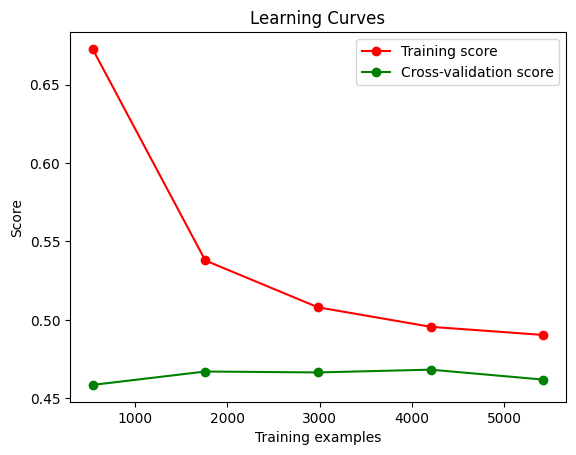

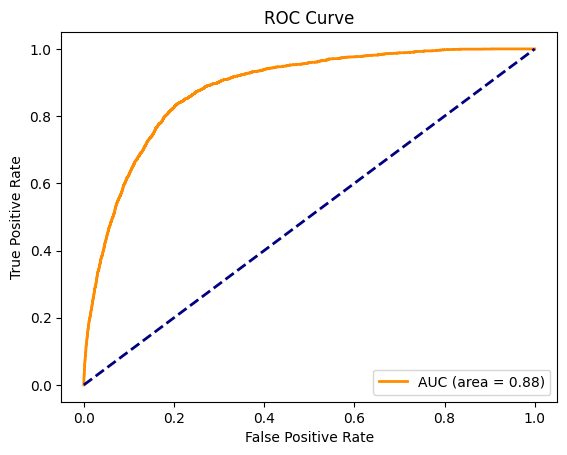

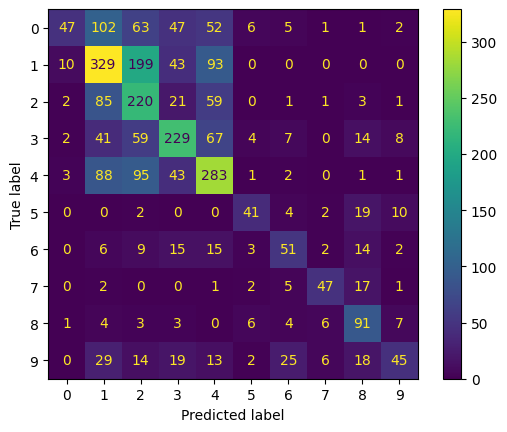

Accuracy: 0.4757481940144479
F1 Score: 0.46517680193532784
Precision: 0.5257300207272383
Recall/Sensitivity/True Positive Rate: 0.4757481940144479
Specificity: 0.9083072369271369
False Positive Rate: 0.09169276307286324
Area under ROC curve: 0.8252797345785611
Confusion Matrix:
 [[ 47 102  63  47  52   6   5   1   1   2]
 [ 10 329 199  43  93   0   0   0   0   0]
 [  2  85 220  21  59   0   1   1   3   1]
 [  2  41  59 229  67   4   7   0  14   8]
 [  3  88  95  43 283   1   2   0   1   1]
 [  0   0   2   0   0  41   4   2  19  10]
 [  0   6   9  15  15   3  51   2  14   2]
 [  0   2   0   0   1   2   5  47  17   1]
 [  1   4   3   3   0   6   4   6  91   7]
 [  0  29  14  19  13   2  25   6  18  45]]


array([1, 4, 4, ..., 9, 6, 1], dtype=int64)

In [185]:
naive_bayes_search_non_binary(reduced_x_train, y_train)